In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.1 MB/s 
     |████████████████████████████████| 101 kB 11.7 MB/s 
     |████████████████████████████████| 596 kB 53.5 MB/s 
     |████████████████████████████████| 6.6 MB 50.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/实验五数据.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: 实验五数据/data/1650.jpg  
  inflating: 实验五数据/data/1136.jpg  
  inflating: 实验五数据/data/4372.txt  
  inflating: 实验五数据/data/2703.txt  
  inflating: 实验五数据/data/3721.jpg  
  inflating: 实验五数据/data/946.txt  
  inflating: 实验五数据/data/211.txt  
  inflating: 实验五数据/data/1785.txt  
  inflating: 实验五数据/data/4825.txt  
  inflating: 实验五数据/data/3192.txt  
  inflating: 实验五数据/data/893.jpg  
  inflating: 实验五数据/data/577.txt  
  inflating: 实验五数据/data/563.txt  
  inflating: 实验五数据/data/887.jpg  
  inflating: 实验五数据/data/3838.txt  
  inflating: 实验五数据/data/4831.txt  
  inflating: 实验五数据/data/139.jpg  
  inflating: 实验五数据/data/3186.txt  
  inflating: 实验五数据/data/1949.txt  
  inflating: 实验五数据/data/1791.txt  
  inflating: 实验五数据/data/205.txt  
  inflating: 实验五数据/data/4819.txt  
  inflating: 实验五数据/data/1485.jpg  
  inflating: 实验五数据/data/111.jpg  
  inflating: 实验五数据/data/1961.txt  
  inflating: 实验五数据/data/3292.jpg  
  inflating: 实验五数据/data/2832.jpg  
  inflating: 实验五数据/data/677.jpg  
  i

In [4]:
import transformers
import pandas as pd
import torch

In [5]:
import chardet

labellist = ['positive','neutral','negative']
datadir = './实验五数据/data/'
df = pd.DataFrame(columns = ['label','text','id'])
testlist = []
with open("./实验五数据/train.txt","r",encoding="utf-8") as f:
     content = f.readlines()
     for line in content:
        line = line.rstrip('\n')
        id,label = line.split(',')
        if(label!='tag'):
           flag = labellist.index(label)
           f2 = open(datadir + id +'.txt',"rb")
           datafile = f2.read()
           #print(id,chardet.detect(datafile))
           f3 = open(datadir + id +'.txt',encoding = chardet.detect(datafile)['encoding'],errors='ignore')
           text = f3.read()
           text = text.rstrip('\n')
           #print(text)
           df = df.append({'label':flag,'text':text,'id':id},ignore_index=True)

with open("./实验五数据/test_without_label.txt","r",encoding="utf-8") as f:
     content = f.readlines()
     for line in content:
        line = line.rstrip('\n')
        id,label = line.split(',')
        if(label!='tag'):
           testlist.append(id)

In [6]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
modelbert = BertModel.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
from torchvision import models
resmodel = models.resnet101(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [8]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
 )])

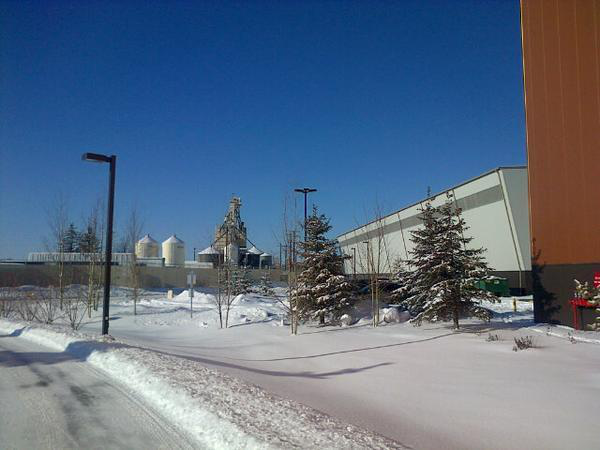

In [9]:
from PIL import Image
img = Image.open(datadir +str(df['id'][1])+'.jpg')
img

In [10]:
import torch
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

batch_t.size()

torch.Size([1, 3, 224, 224])

In [11]:
resmodel.eval()
out = resmodel(batch_t)

In [32]:
from torch.nn.modules.activation import Softmax
import torch
import torchvision
import torch.nn as nn


class SentimentClassifier(nn.Module):
    def __init__(self):
        super(SentimentClassifier, self).__init__()
        self.txtlay = nn.Sequential(
            nn.Linear(768, 32),
            #nn.ReLU()
        )
        self.imglay = nn.Sequential(
            nn.Linear(1000, 32),
            #nn.ReLU()
        )

        self.classifier = nn.Sequential(
            nn.Linear(33, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 3)
        )
        
        
    #    self.classifier_ol = nn.Sequential(
    #        nn.Linear(32, 1024),
    #        nn.ReLU(),
    #        nn.Dropout(0.3),
    #        nn.Linear(1024, 1024),
    #        nn.ReLU(),
    #        nn.Dropout(0.3),
    #        nn.Linear(1024, 3)
    #    )        


    def forward(self, x = None, y = None):
    #    if(x==None):
    #      image = y
    #      image = self.imglay(image)
    #      out = self.classifier_ol(image)
          #result = torch.mean(out,dim = 1)
    #      return out
    #    elif(y==None):          
    #      text = x
    #      text = self.txtlay(text)
    #      out = self.classifier_ol(text)
    #      #result = torch.mean(out,dim = 1)
    #      return out 
    #    else:
          text, image = x, y
          #x [B,768]  y [B,1000]
          text = self.txtlay(text)
          image = self.imglay(image)
          B,width = text.shape
          unite = torch.zeros(B,width+1,width+1)
          #print(text,image)
          for i in range(B):
              for j in range(width+1):#text
                  for p in range(width+1):#img
                      if(j==width and p==width):
                          unite[i,j,p] = 1
                      elif(j==width and p!=width):
                          unite[i,j,p] = image[i,p]
                      elif(j!=width and p==width):
                          unite[i,j,p] = text[i,j]
                      else:
                          unite[i,j,p] = image[i,p] * text[i,j]

          out = self.classifier(unite)
          result = torch.mean(out,dim = 1)
          return result


In [13]:
smodel = SentimentClassifier()

In [14]:
trainlist = df['id'].tolist()
trainlist = [int(i) for i in trainlist]

In [15]:
labellist = df['label'].tolist()

In [16]:
label_list = []
for i in labellist:
    if(i==0):
        label_list.append([1,0,0])
    elif(i==1):
        label_list.append([0,1,0])
    else:
        label_list.append([0,0,1])

In [17]:
train_label = torch.tensor(label_list)
train_id = torch.tensor(trainlist)

In [18]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
import torch.utils.data as Data

torch_train_dataset = Data.TensorDataset(train_id[0:3000],train_label[0:3000])
eval_data, eval_label = train_id[3000:],train_label[3000:]

In [20]:
train_loader = Data.DataLoader(dataset=torch_train_dataset,batch_size=32,shuffle=True)

In [21]:
modelbert.to(device)
resmodel.to(device)
num_epoches = 15
optimizer = torch.optim.SGD(smodel.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()
best_acc = 0.
for epoch in range(1,num_epoches + 1):
  train_loss,train_acc,loss = 0.,0.,0.
  for id,x in enumerate(train_loader):
      index,label = x
      batchsize = index.shape[0]
      text = torch.zeros(batchsize,768)
      img = torch.zeros(batchsize,1000)
      for i in range(batchsize):
          torch.cuda.empty_cache()
          ind = index[i]
          textfile = datadir + str(int(ind)) + '.txt'
          imgfile = datadir + str(int(ind)) + '.jpg'
          f2 = open(textfile,"rb")
          datafile = f2.read()
          f3 = open(textfile,encoding = chardet.detect(datafile)['encoding'],errors='ignore')
          ttext = f3.read()
          ttext = ttext.rstrip('\n')
          input_id = tokenizer(ttext, return_tensors="pt").to(device)
          result = modelbert(input_id['input_ids'])
          text[i,:] = result[1]
          iimg = Image.open(imgfile)  
          img_t = preprocess(iimg)
          batch_t = torch.unsqueeze(img_t, 0).to(device)        
          out = resmodel(batch_t)     
          img[i,:] = out
   
      y = smodel(text,img)
      #print(y)
      loss = loss_func(y,label.float()).sum()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
      ylist = y.argmax(dim=1)
      for j in range(len(ylist)):
        if(label[j][ylist[j]] == 1):
          train_acc += 1
  if(train_acc/3000 > best_acc):
    best_acc = train_acc/300
    best_model = smodel
  print("epoch:%d, train_loss:%.3f, train_acc:%.3f"%(epoch,train_loss/3000,train_acc/3000))

epoch:1, train_loss:0.029, train_acc:0.592
epoch:2, train_loss:0.027, train_acc:0.598
epoch:3, train_loss:0.026, train_acc:0.601
epoch:4, train_loss:0.025, train_acc:0.614
epoch:5, train_loss:0.025, train_acc:0.633
epoch:6, train_loss:0.024, train_acc:0.650
epoch:7, train_loss:0.024, train_acc:0.646
epoch:8, train_loss:0.024, train_acc:0.657
epoch:9, train_loss:0.023, train_acc:0.675
epoch:10, train_loss:0.022, train_acc:0.682
epoch:11, train_loss:0.022, train_acc:0.690
epoch:12, train_loss:0.022, train_acc:0.692
epoch:13, train_loss:0.021, train_acc:0.707
epoch:14, train_loss:0.021, train_acc:0.710
epoch:15, train_loss:0.020, train_acc:0.718


In [45]:
with torch.no_grad():
  dev_loss,d_l_t,d_l_i,d_a_t,d_a_i,dev_acc,loss = 0.,0.,0.,0.,0.,0.,0.
  index,label = eval_data, eval_label
  batchsize = len(index)
  text = torch.zeros(batchsize,768)
  img = torch.zeros(batchsize,1000)
  oltext = torch.ones(batchsize,768)
  olimg = torch.ones(batchsize,1000)
  for i in range(batchsize):
      torch.cuda.empty_cache()
      ind = index[i]
      textfile = datadir + str(int(ind)) + '.txt'
      imgfile = datadir + str(int(ind)) + '.jpg'
      f2 = open(textfile,"rb")
      datafile = f2.read()
      f3 = open(textfile,encoding = chardet.detect(datafile)['encoding'],errors='ignore')
      ttext = f3.read()
      ttext = ttext.rstrip('\n')
      input_id = tokenizer(ttext, return_tensors="pt").to(device)
      result = modelbert(input_id['input_ids'])
      text[i,:] = result[1]
      iimg = Image.open(imgfile)  
      img_t = preprocess(iimg)
      batch_t = torch.unsqueeze(img_t, 0).to(device)        
      out = resmodel(batch_t)     
      img[i,:] = out


  y_ot = best_model(text,olimg)
  y_oi = best_model(oltext,img)
  y = best_model(text,img)
  ylist = y.argmax(dim=1)
  #print(y_ot.shape)
  y_t_list = y_ot.argmax(dim=1)
  y_i_list = y_oi.argmax(dim=1)
  for j in range(len(ylist)):
    if(label[j][ylist[j]] == 1):
      dev_acc += 1
    if(label[j][y_t_list[j]] == 1):
      d_a_t += 1
    if(label[j][y_i_list[j]] == 1):
      d_a_i += 1  
  print("2features:dev_acc:%.3f"%(dev_acc/batchsize))
  print("text:dev_acc:%.3f"%(d_a_t/batchsize))
  print("img:dev_acc:%.3f"%(d_a_i/batchsize))

2features:dev_acc:0.623
text:dev_acc:0.211
img:dev_acc:0.611


In [42]:
testlabel = []

with torch.no_grad():
  index = testlist
  batchsize = len(index)
  text = torch.zeros(batchsize,768)
  img = torch.zeros(batchsize,1000)
  for i in range(batchsize):
      torch.cuda.empty_cache()
      ind = index[i]
      textfile = datadir + str(int(ind)) + '.txt'
      imgfile = datadir + str(int(ind)) + '.jpg'
      f2 = open(textfile,"rb")
      datafile = f2.read()
      f3 = open(textfile,encoding = chardet.detect(datafile)['encoding'],errors='ignore')
      ttext = f3.read()
      ttext = ttext.rstrip('\n')
      input_id = tokenizer(ttext, return_tensors="pt").to(device)
      result = modelbert(input_id['input_ids'])
      text[i,:] = result[1]
      iimg = Image.open(imgfile)  
      img_t = preprocess(iimg)
      batch_t = torch.unsqueeze(img_t, 0).to(device)        
      out = resmodel(batch_t)     
      img[i,:] = out


  y = best_model(text,img)
  ylist = y.argmax(dim=1)
  for j in range(len(ylist)):
    testlabel.append(ylist[j])

In [43]:
labellist = ['positive','neutral','negative']

with open("./实验五数据/test_with_label.txt", 'w+') as f:
    f.write("guid,tag\n")
    for i in range(len(testlist)):
        f.write(str(testlist[i]) + "," + labellist[testlabel[i]] + "\n")